# Udacity Machine Learning Engineer Nanodegree

## Capstone Project Workflow

**Mark Bannister**  
*January 2018*

## I. Import data and libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Import data from csv
tracks = pd.read_csv("Data/markbannister_tracks_master.csv")

In [3]:
# Print first five rows
tracks.head()

,Track,Artist,Album,First_played,Last_played,Play_count,Days_in_library,Plays_per_year,uri,explicit,...,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1%,Lars Frederiksen and the Bastards,Viking,28/09/06 16:56,24/05/09 11:55,6,4069,0.538216,spotify:track:38NY49T4OlgIXjOSY1RKz8,False,...,38NY49T4OlgIXjOSY1RKz8,0.000,E,0.210,-2.725,Minor,0.0749,181.567,4,0.828
1,10:37,Beach House,Depression Cherry,29/08/15 06:09,24/12/15 19:19,20,813,8.979090,spotify:track:4RGbULF7N4dvC01DCiXmRp,False,...,4RGbULF7N4dvC01DCiXmRp,0.142,F,0.101,-8.982,Major,0.0266,96.085,4,0.482
2,12:51,The Strokes,inf,27/10/06 22:54,19/11/15 12:56,33,4040,2.981436,spotify:track:6Yu1OL8I0D4vjOzYdsXYGK,False,...,6Yu1OL8I0D4vjOzYdsXYGK,0.800,E,0.558,-3.838,Major,0.0379,145.056,4,0.591
3,11:11 pm,The All-American Rejects,Move Along,11/10/09 21:59,26/11/11 20:50,12,2960,1.479730,spotify:track:6rNLw2HJIf0oGBSFJVbMnV,False,...,6rNLw2HJIf0oGBSFJVbMnV,0.000,G#/Ab,0.132,-4.225,Major,0.0601,153.745,4,0.682
4,3,Britney Spears,The Essential Britney Spears (Remastered),29/03/17 16:56,29/03/17 16:56,1,234,1.559829,spotify:track:2d7fRuDlFZfKIoSuf8bhGv,False,...,2d7fRuDlFZfKIoSuf8bhGv,0.000,F,0.199,-1.948,Minor,0.0475,134.962,4,0.761


## II. Analysis

### Data exploration

**Label distribution**

In [4]:
# Total number of tracks
n_records = tracks.shape[0]

# Number of tracks where play count is three or more
n_greater_3 = tracks[tracks['Play_count'] >= 3].shape[0]

# Number of tracks where play count is two or less
n_lessthan_3 = tracks[tracks['Play_count'] < 3].shape[0]

# Percentage of tracks where play count is three or more
greater_percent = 100. * n_greater_3 / n_records

# Print the results
print "Total number of tracks: {}".format(n_records)
print "Tracks with three plays or more: {}".format(n_greater_3)
print "Tracks with two plays or less: {}".format(n_lessthan_3)
print "Percentage of tracks with three plays or more: {:.2f}%".format(greater_percent)

Total number of tracks: 10832
Tracks with three plays or more: 4963
Tracks with two plays or less: 5869
Percentage of tracks with three plays or more: 45.82%


**Featureset exploration**

- **explicit**: True, False.
- **popularity**: continuous, integers only (0-100).
- **acousticness**: continuous (0-1).
- **danceability**: continuous (0-1).
- **duration_ms**: continuous (lower bound = 0).
- **energy**: continuous (0-1).
- **instrumentalness**: continuous (0-1).
- **key**: C, C#/Db, D, D#/Eb, E, F, F#/Gb, G, G#/Ab, A, A#/Bb, B.
- **liveness**: continuous (0-1).
- **loudness**: continuous (upper bound = 0).
- **mode**: Major, Minor.
- **speechiness**: continuous (0-1).
- **tempo**: continuous (lower bound = 0).
- **time_signature**: 0, 1, 3, 4, 5.
- **valence**: continuous (0-1).

In [5]:
# Print summary statistics
tracks.describe()

,Play_count,Days_in_library,Plays_per_year,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
count,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000,1.083200e+04,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000,10832.000000
mean,8.219996,1897.799668,1.886108,41.605428,0.203145,0.528272,2.466959e+05,0.695913,0.169082,0.213127,-7.574049,0.095316,123.019689,3.918113,0.453782
std,15.027672,1450.319263,4.618378,16.518349,0.283558,0.178044,9.705844e+04,0.226898,0.300337,0.171790,3.901967,0.101264,29.072481,0.399238,0.244583
min,1.000000,2.000000,0.087888,0.000000,0.000001,0.000000,2.629300e+04,0.000070,0.000000,0.014900,-37.687000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,680.000000,0.406459,31.000000,0.002730,0.404750,1.944915e+05,0.551000,0.000003,0.100000,-9.231250,0.037000,100.705000,4.000000,0.254000
50%,2.000000,1317.000000,0.991144,42.000000,0.050650,0.527000,2.331280e+05,0.738000,0.001095,0.140000,-6.737000,0.053850,121.011000,4.000000,0.435000
75%,8.000000,3455.000000,2.221236,53.000000,0.306000,0.658000,2.813342e+05,0.885000,0.162000,0.289000,-4.938000,0.106000,140.403250,4.000000,0.642000
max,227.000000,4156.000000,182.500000,94.000000,0.996000,0.976000,2.266147e+06,0.999000,0.991000,0.999000,-0.184000,0.954000,239.981000,5.000000,0.993000


**Data visualisation**

In [7]:
# Function to plot histogram of selected feature, with adjustable bins number and title
def plot_hist(df, field, bins, transformed=0):
    plt.hist(df[field], bins=bins)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    if transformed == 1:
        plt.title("'" + field + "' Feature Distribution - Log-Transformed")
    else:
        plt.title("'" + field + "' Feature Distribution")
    plt.show()

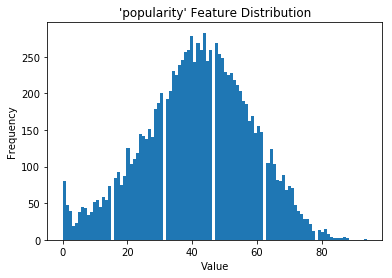

In [8]:
plot_hist(tracks, "popularity", 100)

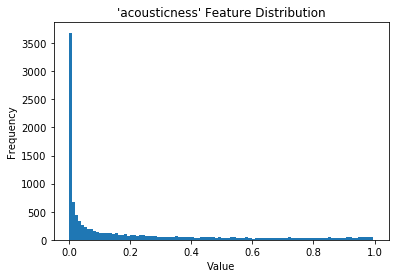

In [9]:
plot_hist(tracks, "acousticness", 100)

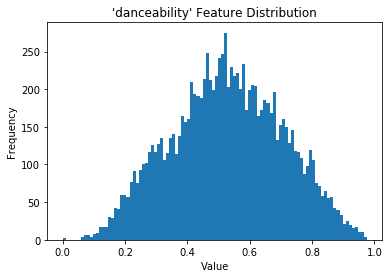

In [10]:
plot_hist(tracks, "danceability", 100)

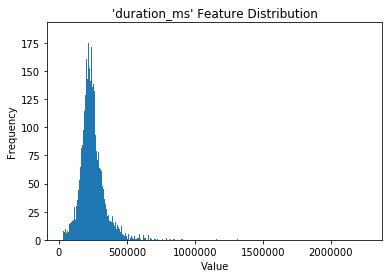

In [11]:
plot_hist(tracks, "duration_ms", 1000)

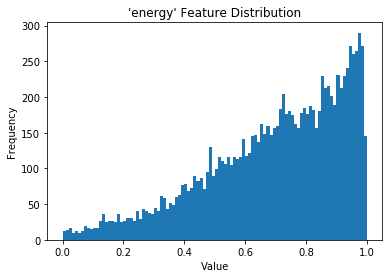

In [12]:
plot_hist(tracks, "energy", 100)

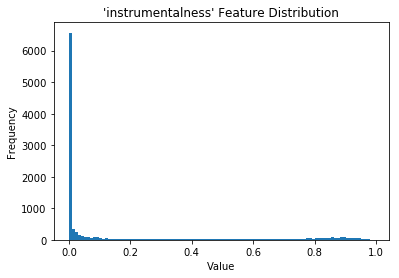

In [13]:
plot_hist(tracks, "instrumentalness", 100)

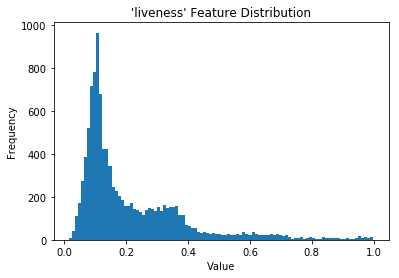

In [14]:
plot_hist(tracks, "liveness", 100)

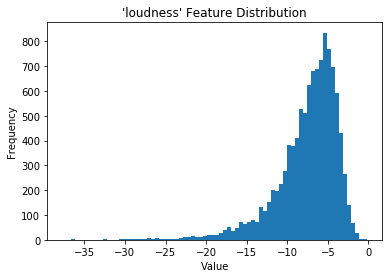

In [15]:
plot_hist(tracks, "loudness", 76)

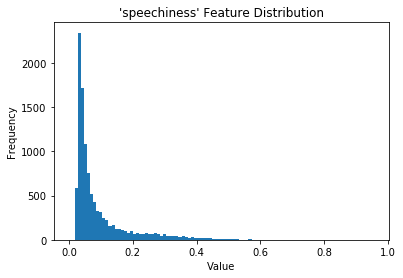

In [16]:
plot_hist(tracks, "speechiness", 100)

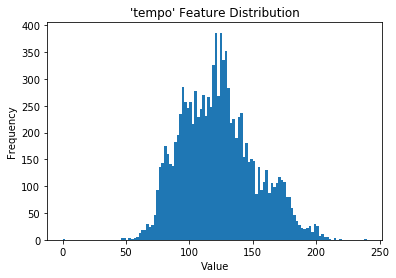

In [17]:
plot_hist(tracks, "tempo", 120)

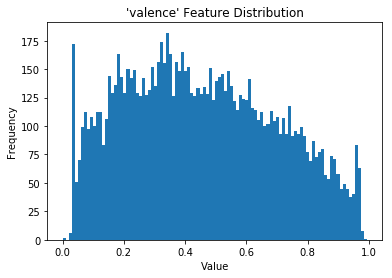

In [18]:
plot_hist(tracks, "valence", 100)

### Data pre-processing

In [19]:
# Coerce time_signature values to string for use with pd.get_dummies()
tracks["time_signature"] = tracks["time_signature"].map({0: "0", 1: "1", 3: "3", 
                                                         4: "4", 5: "5"})

# Coerce explicit to binary
tracks["explicit"] = tracks["explicit"].map({False: 0, True: 1})

# Coerce mode to binary
tracks["mode"] = tracks["mode"].map({"Major": 1, "Minor": 0})

# Create vector of labels (i.e. 1 = "Like", 0 = "Dislike")
tracks_labels = np.array((tracks["Play_count"] >= 3).map({False: 0, True: 1}))

# Create dataframe of features
tracks_features_raw = tracks[["explicit", "popularity", "acousticness",
                              "danceability", "duration_ms", "energy",
                              "instrumentalness", "key", "liveness", "loudness",
                              "mode", "speechiness", "tempo", "time_signature",
                              "valence"]]

In [20]:
# Transform skewed features
tracks_features_trans = tracks_features_raw.copy()
tracks_features_trans["duration_ms"] = tracks_features_trans["duration_ms"].apply(lambda x: np.log(x + 1))
tracks_features_trans["loudness"] = tracks_features_trans["loudness"].apply(lambda x: np.log(-x + 1))

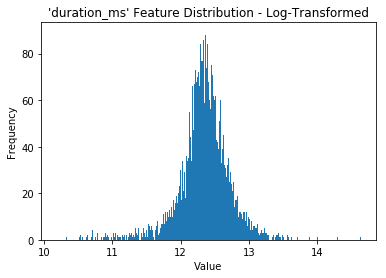

In [21]:
plot_hist(tracks_features_trans, "duration_ms", 1000, transformed = 1)

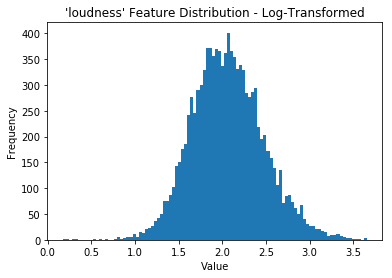

In [22]:
plot_hist(tracks_features_trans, "loudness", 100, transformed = 1)

In [23]:
# One-hot encode categorical features
tracks_features_final = pd.get_dummies(tracks_features_trans)

In [24]:
# Get total number of features in final dataset
len(list(tracks_features_final.columns))

30

In [25]:
# List features in final dataset
list(tracks_features_final.columns)

['explicit',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'key_A',
 'key_A#/Bb',
 'key_B',
 'key_C',
 'key_C#/Db',
 'key_D',
 'key_D#/Eb',
 'key_E',
 'key_F',
 'key_F#/Gb',
 'key_G',
 'key_G#/Ab',
 'time_signature_0',
 'time_signature_1',
 'time_signature_3',
 'time_signature_4',
 'time_signature_5']

In [26]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the features and labels data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tracks_features_final, 
                                                    tracks_labels, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 8665 samples.
Testing set has 2167 samples.


## III. Methodology

### Default classifiers

In [27]:
# Import classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

/Users/Mark/anaconda/envs/DAND/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
# Initialise classifiers
clf_A = DecisionTreeClassifier(random_state = 101)
clf_B = RandomForestClassifier(random_state = 101)
clf_C = xgb.XGBClassifier(seed = 101)

# Fit classifiers to training data using default parameters
clf_A_fit = clf_A.fit(X_train, y_train)
clf_B_fit = clf_B.fit(X_train, y_train)
clf_C_fit = clf_C.fit(X_train, y_train)

In [29]:
# Import evaluation metrics and scoring function
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer

# Predict test data labels using default models and print results
clf_A_pred = clf_A_fit.predict(X_test)
clf_B_pred = clf_B_fit.predict(X_test)
clf_C_pred = clf_C_fit.predict(X_test)

print "Decision Trees"
print "Accuracy: " + str(accuracy_score(y_test, clf_A_pred))
print "Precision: " + str(precision_score(y_test, clf_A_pred))
print "Recall: " + str(recall_score(y_test, clf_A_pred))
print "F1: " + str(f1_score(y_test, clf_A_pred))

print "Random Forest"
print "Accuracy: " + str(accuracy_score(y_test, clf_B_pred))
print "Precision: " + str(precision_score(y_test, clf_B_pred))
print "Recall: " + str(recall_score(y_test, clf_B_pred))
print "F1: " + str(f1_score(y_test, clf_B_pred))

print "XGBoost"
print "Accuracy: " + str(accuracy_score(y_test, clf_C_pred))
print "Precision: " + str(precision_score(y_test, clf_C_pred))
print "Recall: " + str(recall_score(y_test, clf_C_pred))
print "F1: " + str(f1_score(y_test, clf_C_pred))

Decision Trees
Accuracy: 0.537148131057
Precision: 0.504073319756
Recall: 0.489614243323
F1: 0.496738585048
Random Forest
Accuracy: 0.588371019843
Precision: 0.580080753701
Recall: 0.426310583581
F1: 0.491448118586
XGBoost
Accuracy: 0.631748961698
Precision: 0.631644004944
Recall: 0.505440158259
F1: 0.561538461538


### Benchmark model

In [95]:
# Test benchmark model on test data
benchmark_pred = (X_test["popularity"] >= 50).map({False: 0, True: 1})

print "Benchmark model"
print "Accuracy: " + str(accuracy_score(y_test, benchmark_pred))
print "Precision: " + str(precision_score(y_test, benchmark_pred))
print "Recall: " + str(recall_score(y_test, benchmark_pred))
print "F1: " + str(f1_score(y_test, benchmark_pred))

Benchmark model
Accuracy: 0.549146285187
Precision: 0.524566473988
Recall: 0.359050445104
F1: 0.42630651791


### Optimise classifiers

In [37]:
# Import RandomizedSearchCV and random integer function
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Tune Decision Tree classifier using random search
dt_params = {"max_depth": [3, None],
             "max_features": range(2, 31, 8) + [None],
             "min_samples_split": sp_randint(2, 11),
             "min_samples_leaf": sp_randint(1, 11),
             "criterion": ["gini", "entropy"]
            }

n_iter = 50
cv = 5
precision_scoring = make_scorer(precision_score)

clf_A_search = RandomizedSearchCV(clf_A,
                                  param_distributions = dt_params,
                                  n_iter = n_iter,
                                  scoring = precision_scoring,
                                  cv = cv,
                                  random_state = 101)

# Fit best model to training data
clf_A_best_fit = clf_A_search.fit(X_train, y_train)

In [38]:
# Tune Random Forest classifier using random search
rf_params = {"max_depth": [3, None],
             "max_features": range(2, 31, 8) + [None],
             "min_samples_split": sp_randint(2, 11),
             "min_samples_leaf": sp_randint(1, 11),
             "criterion": ["gini", "entropy"],
             "n_estimators": [100]
            }

n_iter = 50
cv = 5

clf_B_search = RandomizedSearchCV(clf_B,
                                  param_distributions = rf_params,
                                  n_iter = n_iter,
                                  scoring = precision_scoring,
                                  cv = cv,
                                  random_state = 101)

# Fit best model to training data
clf_B_best_fit = clf_B_search.fit(X_train, y_train)

In [74]:
# Tune XGBoost classifier using random search
xgb_params = {"n_estimators": [100],
              "learning_rate": [i / 100.0 for i in range(5, 31, 1)],
              "min_child_weight": range(1, 13, 1),
              "max_depth": range(3, 7),
              "gamma": [i / 100.0 for i in range(0, 50)],
              "subsample": [i / 100.0 for i in range(50, 101)],
              "colsample_bytree": [i / 100.0 for i in range(50, 101)]
             }

n_iter = 50
cv = 5

clf_C_search = RandomizedSearchCV(clf_C,
                                  param_distributions = xgb_params,
                                  n_iter = n_iter,
                                  scoring = precision_scoring,
                                  cv = cv,
                                  random_state = 101)

# Fit best model to training data
clf_C_best_fit = clf_C_search.fit(X_train, y_train)

In [76]:
# Predict test data labels using optimised models and print results
clf_A_best_pred = clf_A_best_fit.predict(X_test)
clf_B_best_pred = clf_B_best_fit.predict(X_test)
clf_C_best_pred = clf_C_best_fit.predict(X_test)

print "Decision Trees"
print "Accuracy: " + str(accuracy_score(y_test, clf_A_best_pred))
print "Precision: " + str(precision_score(y_test, clf_A_best_pred))
print "Recall: " + str(recall_score(y_test, clf_A_best_pred))
print "F1: " + str(f1_score(y_test, clf_A_best_pred))

print "Random Forest"
print "Accuracy: " + str(accuracy_score(y_test, clf_B_best_pred))
print "Precision: " + str(precision_score(y_test, clf_B_best_pred))
print "Recall: " + str(recall_score(y_test, clf_B_best_pred))
print "F1: " + str(f1_score(y_test, clf_B_best_pred))

print "XGBoost"
print "Accuracy: " + str(accuracy_score(y_test, clf_C_best_pred))
print "Precision: " + str(precision_score(y_test, clf_C_best_pred))
print "Recall: " + str(recall_score(y_test, clf_C_best_pred))
print "F1: " + str(f1_score(y_test, clf_C_best_pred))

Decision Trees
Accuracy: 0.597138901707
Precision: 0.615771812081
Recall: 0.363006923838
F1: 0.456751711263
Random Forest
Accuracy: 0.604983848639
Precision: 0.691358024691
Recall: 0.276953511375
F1: 0.395480225989
XGBoost
Accuracy: 0.636363636364
Precision: 0.638854296389
Recall: 0.507418397626
F1: 0.565600882029


## IV. Results

In [77]:
# Obtain best XGBoost parameters
bestidx = clf_C_best_fit.cv_results_["rank_test_score"].argmin()
clf_C_best_fit.cv_results_["params"][bestidx]

{'colsample_bytree': 0.75,
 'gamma': 0.06,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.67}

**Get final model CV results**

In [124]:
# Print best XGBoost train and test scores
print "XGBoost train scores:"
for i in range(0, 5):
    print "Fold {0}: ".format(i) + str(clf_C_best_fit.cv_results_["split" + str(i) + "_train_score"][bestidx])
print "Mean: " + str(clf_C_best_fit.cv_results_["mean_train_score"][bestidx])
print "Std: " + str(clf_C_best_fit.cv_results_["std_train_score"][bestidx])

print "XGBoost test scores:"
for i in range(0, 5):
    print "Fold {0}: ".format(i) + str(clf_C_best_fit.cv_results_["split" + str(i) + "_test_score"][bestidx])
print "Mean: " + str(clf_C_best_fit.cv_results_["mean_test_score"][bestidx])
print "Std: " + str(clf_C_best_fit.cv_results_["std_test_score"][bestidx])

XGBoost train scores:
Fold 0: 0.683351872451
Fold 1: 0.678651685393
Fold 2: 0.682945440671
Fold 3: 0.680358476475
Fold 4: 0.677254472435
Mean: 0.680512389485
Std: 0.00236990860687
XGBoost test scores:
Fold 0: 0.581395348837
Fold 1: 0.626391096979
Fold 2: 0.626427406199
Fold 3: 0.596385542169
Fold 4: 0.589595375723
Mean: 0.604041470488
Std: 0.0188744036157


### Compare final model with benchmark

In [130]:
# Print and compare benchmark and final model results on test data
print "Benchmark model"
print "Accuracy: " + str(accuracy_score(y_test, benchmark_pred))
print "Precision: " + str(precision_score(y_test, benchmark_pred))
print "Recall: " + str(recall_score(y_test, benchmark_pred))
print "F1: " + str(f1_score(y_test, benchmark_pred))
print "XGBoost"
print "Accuracy: " + str(accuracy_score(y_test, clf_C_best_pred))
print "Precision: " + str(precision_score(y_test, clf_C_best_pred))
print "Recall: " + str(recall_score(y_test, clf_C_best_pred))
print "F1: " + str(f1_score(y_test, clf_C_best_pred))
print "Absolute Delta"
print "Accuracy: " + str(accuracy_score(y_test, clf_C_best_pred) - accuracy_score(y_test, benchmark_pred))
print "Precision: " + str(precision_score(y_test, clf_C_best_pred) - precision_score(y_test, benchmark_pred))
print "Recall: " + str(recall_score(y_test, clf_C_best_pred) - recall_score(y_test, benchmark_pred))
print "F1: " + str(f1_score(y_test, clf_C_best_pred) - f1_score(y_test, benchmark_pred))
print "Relative Delta"
print "Accuracy: " + str(accuracy_score(y_test, clf_C_best_pred) / accuracy_score(y_test, benchmark_pred) - 1)
print "Precision: " + str(precision_score(y_test, clf_C_best_pred) / precision_score(y_test, benchmark_pred) - 1)
print "Recall: " + str(recall_score(y_test, clf_C_best_pred) / recall_score(y_test, benchmark_pred) - 1)
print "F1: " + str(f1_score(y_test, clf_C_best_pred) / f1_score(y_test, benchmark_pred) - 1)

Benchmark model
Accuracy: 0.549146285187
Precision: 0.524566473988
Recall: 0.359050445104
F1: 0.42630651791
XGBoost
Accuracy: 0.636363636364
Precision: 0.638854296389
Recall: 0.507418397626
F1: 0.565600882029
Absolute Delta
Accuracy: 0.0872173511767
Precision: 0.1142878224
Recall: 0.148367952522
F1: 0.139294364119
Relative Delta
Accuracy: 0.158823529412
Precision: 0.217871000278
Recall: 0.413223140496
F1: 0.326746972582


## V. Conclusion

In [104]:
# Get Random Forest feature importances (for comparison only)
importances = clf_B_fit.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:30]]
values = importances[indices][:30]

In [105]:
# Print Random Forest feature importances
print columns
print values

['energy' 'acousticness' 'danceability' 'popularity' 'duration_ms'
 'speechiness' 'loudness' 'valence' 'tempo' 'liveness' 'instrumentalness'
 'mode' 'key_D' 'key_E' 'explicit' 'key_G' 'key_C' 'key_A' 'key_B' 'key_F'
 'key_C#/Db' 'key_G#/Ab' 'key_F#/Gb' 'time_signature_4' 'time_signature_3'
 'key_A#/Bb' 'key_D#/Eb' 'time_signature_5' 'time_signature_1'
 'time_signature_0']
[  9.30766330e-02   9.16306042e-02   8.59321769e-02   8.23021228e-02
   8.08111068e-02   7.98182565e-02   7.94792657e-02   7.70165043e-02
   7.67539085e-02   7.63581122e-02   6.52469961e-02   1.10521844e-02
   8.03761473e-03   7.74721200e-03   7.57005252e-03   7.50766702e-03
   7.40989591e-03   7.30713604e-03   7.29302171e-03   7.13275042e-03
   6.28285348e-03   5.90736497e-03   5.90012786e-03   5.30414424e-03
   5.10704163e-03   4.96726358e-03   4.53106689e-03   1.52181714e-03
   9.55819754e-04   3.92786749e-05]


In [106]:
# Get XGBoost feature importances (for comparison only)
importances = clf_C_fit.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train.columns.values[indices[:30]]
values = importances[indices][:30]

In [107]:
# Print XGBoost feature importances
print columns
print values

['popularity' 'acousticness' 'speechiness' 'danceability' 'duration_ms'
 'loudness' 'liveness' 'valence' 'energy' 'tempo' 'instrumentalness'
 'explicit' 'key_D#/Eb' 'key_E' 'mode' 'time_signature_1'
 'time_signature_5' 'key_A' 'key_B' 'key_C#/Db' 'key_G' 'time_signature_4'
 'key_C' 'key_D' 'key_F' 'key_F#/Gb' 'key_G#/Ab' 'time_signature_0'
 'time_signature_3' 'key_A#/Bb']
[ 0.14263566  0.10232558  0.1007752   0.09147287  0.08527132  0.08527132
  0.08372093  0.075969    0.0744186   0.06356589  0.04031008  0.0124031
  0.0124031   0.00930233  0.00775194  0.00465116  0.00155039  0.00155039
  0.00155039  0.00155039  0.00155039  0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]


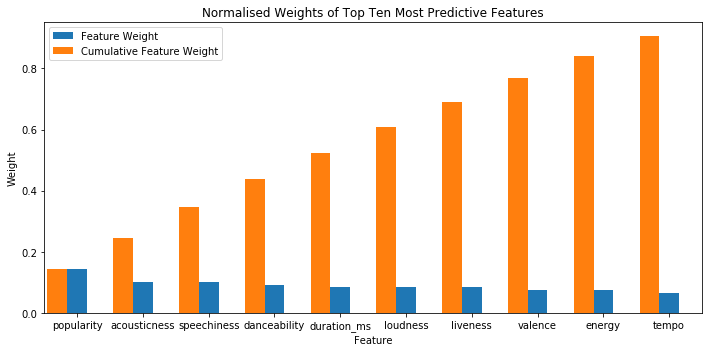

In [160]:
# Plot top ten XGBoost feature importances
num_feats = 10
plt.figure(figsize = (10,5))
plt.bar(np.arange(num_feats), values[:num_feats], width = 0.3, align="center", \
        label = "Feature Weight")
plt.bar(np.arange(num_feats) - 0.3, np.cumsum(values[:num_feats]), width = 0.3, \
        align = "center", label = "Cumulative Feature Weight")
plt.xticks(np.arange(num_feats), columns[:num_feats])
plt.xlim((-0.5, (num_feats - 0.5)))
plt.ylabel("Weight")
plt.xlabel("Feature")
plt.title("Normalised Weights of Top Ten Most Predictive Features")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()  


In [152]:
# Sum top 5 most important features
sum(values[:5])

0.52248062938451767

In [154]:
# Sum next 5 most important features
sum(values[5:10])

0.38294574618339539

## Export models

In [98]:
# Import joblib
from sklearn.externals import joblib

# Export training and test data using joblib
joblib.dump(X_train, "X_train.dat")
joblib.dump(y_train, "y_train.dat")
joblib.dump(X_test, "X_test.dat")
joblib.dump(y_test, "y_test.dat")

# Export models using joblib
joblib.dump(clf_A_fit, "clf_A_fit.dat")
joblib.dump(clf_A_best_fit, "clf_A_fit.dat")
joblib.dump(clf_B_fit, "clf_B_fit.dat")
joblib.dump(clf_B_best_fit, "clf_B_fit.dat")
joblib.dump(clf_C_fit, "clf_C_fit.dat")
joblib.dump(clf_C_best_fit, "clf_C_fit.dat")

['clf_C_fit.dat']